In [16]:
import glob
import xarray as xr
import matplotlib.pyplot as plt

In [17]:
filter_dir = '/home/hanna/MS-suppl/filters/'
era_dir = '/home/hanna/lagrings/dataERA5_grib/'

In [18]:
filters = glob.glob(filter_dir+'*land*.nc')
era = glob.glob(era_dir + '*.grib')

In [19]:
era

['/home/hanna/lagrings/dataERA5_grib/spesific_humidity_plev1000_2012-2018.grib',
 '/home/hanna/lagrings/dataERA5_grib/_ALL_12-18_grib.grib',
 '/home/hanna/lagrings/dataERA5_grib/2m_temperature2012_2018_surface_level.grib',
 '/home/hanna/lagrings/dataERA5_grib/surface_pressure2012_2018_surface_level.grib',
 '/home/hanna/lagrings/dataERA5_grib/total_cloud_cover2012_2018_surface_level.grib',
 '/home/hanna/lagrings/dataERA5_grib/2m_temperature2004_2011_surface_level.grib',
 '/home/hanna/lagrings/dataERA5_grib/relative_humidity_ALL_12-18_relative_humidity_2004-2011.grib',
 '/home/hanna/lagrings/dataERA5_grib/_ALL_2004-2011_specific_humidity_2004-2011.grib',
 '/home/hanna/lagrings/dataERA5_grib/surface_pressure2004_2011_surface_level.grib',
 '/home/hanna/lagrings/dataERA5_grib/total_cloud_cover2004_2011_surface_level.grib']

In [20]:
mask = xr.open_dataset(filters[0])

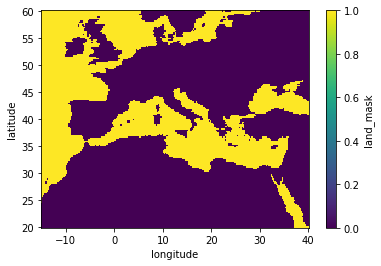

In [21]:
mask['land_mask'].plot()
plt.show()

In [22]:
era = xr.open_dataset('/home/hanna/lagrings//DJF_Boreal_79-87_TCC.nc')

In [23]:
era

<xarray.Dataset>
Dimensions:    (latitude: 161, longitude: 221, time: 744)
Coordinates:
  * longitude  (longitude) float32 -15.0 -14.75 -14.5 -14.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2005-12-01 ... 2005-12-31T23:00:00
Data variables:
    tcc        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-28 13:36:27 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

In [24]:
clouds = era.tcc.values

In [25]:
m = mask['land_mask'].values.astype('bool')

In [26]:
import numpy as np

In [27]:
clouds[:, m] = np.nan

In [28]:
ii = xr.DataArray(name='masked', data=np.flip(clouds,axis=1), dims=['time', 'latitude', 'longitude'])

In [29]:
era['masked'] = ii

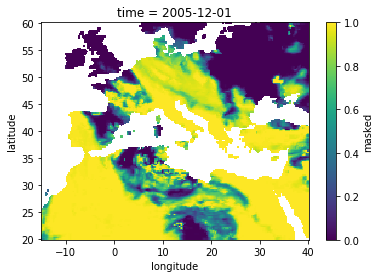

In [30]:
era['masked'].isel(time = 0).plot()